<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Data_Validation_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas -q
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

# Display first few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
print(df.info())
print(df.describe())
print("Unique species:", df['species'].unique())
print(df.describe(include='all'))
print("Missing values per column:")
print(df.isnull().sum())

# Check for negative values in numeric columns
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in numeric_cols:
    has_neg = (df[col] < 0).any()
    print(f"{col} has values < 0: {has_neg}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
print(df[['sepal_length', 'sepal_width', 'sepal_area']].head())
df['species_encoded'] = df['species'].astype('category').cat.codes
print(df[['species', 'species_encoded']].head())

   sepal_length  sepal_width  sepal_area
0           5.1          3.5       17.85
1           4.9          3.0       14.70
2           4.7          3.2       15.04
3           4.6          3.1       14.26
4           5.0          3.6       18.00
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


In [5]:
df.to_csv("iris_prepared.csv", index=False)
print("Prepared data saved to 'iris_prepared.csv'")

Prepared data saved to 'iris_prepared.csv'


1. What kind of data problems could you catch with validation?

   - Missing values
   - Incorrect or unexpected data types
   - Values out of expected range (e.g., negative measurements)
   - Unexpected categories in categorical fields

2. Why is preparation crucial before training machine learning models?

   - ML algorithms expect clean, numeric data.
   - Missing values, outliers, or unencoded categories can degrade model performance.
   - Feature scaling and transformation can help models converge faster and perform better.

3. What issues would occur if you skip validation and preparation?

   - Model might crash or produce misleading results.
   - Training could be biased due to data imbalance or outliers.
   - You may misinterpret results due to improperly encoded or unclean data.


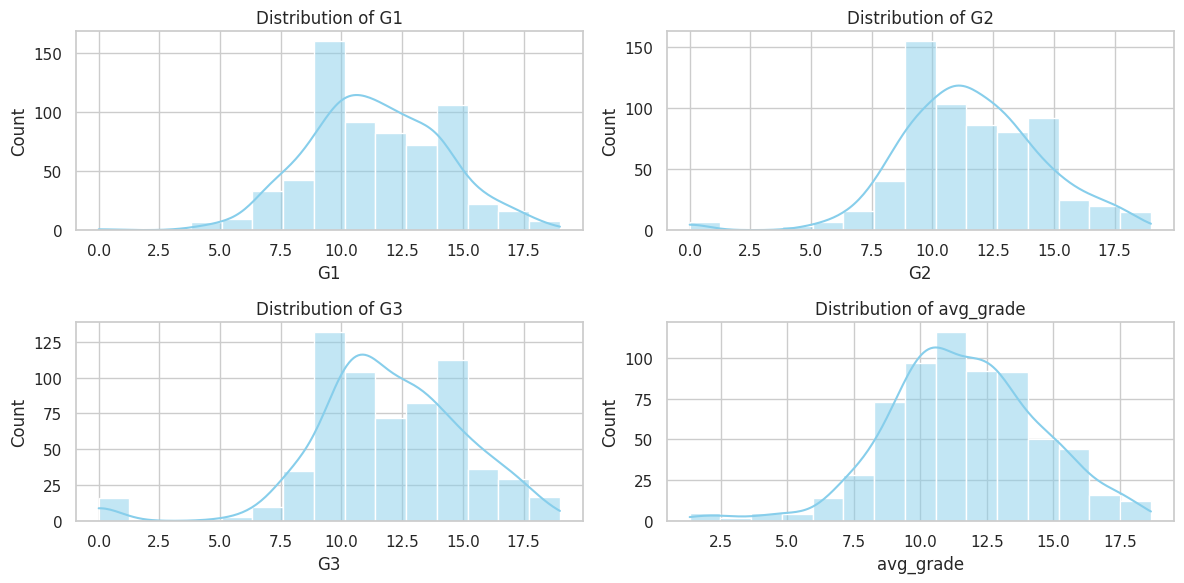

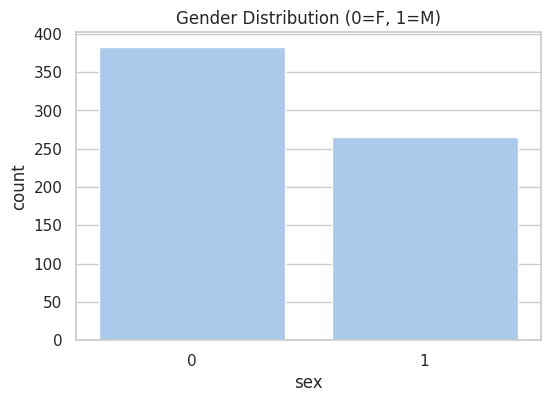

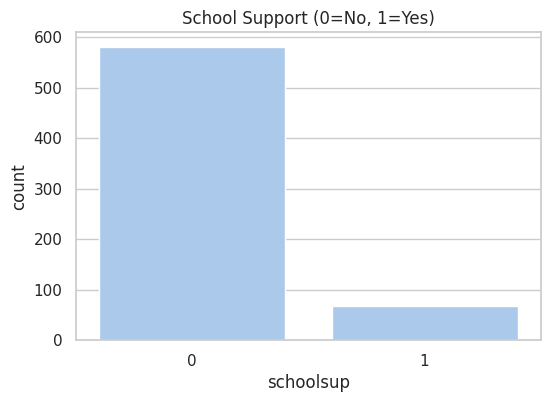

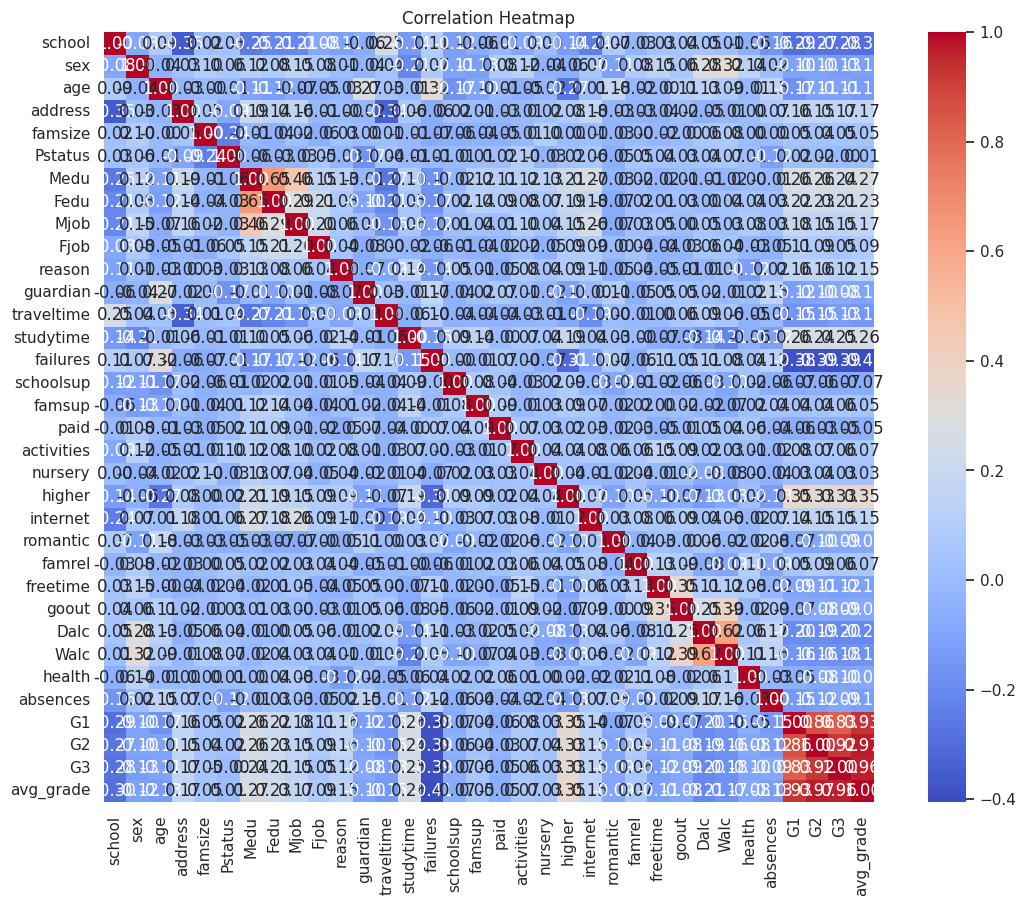

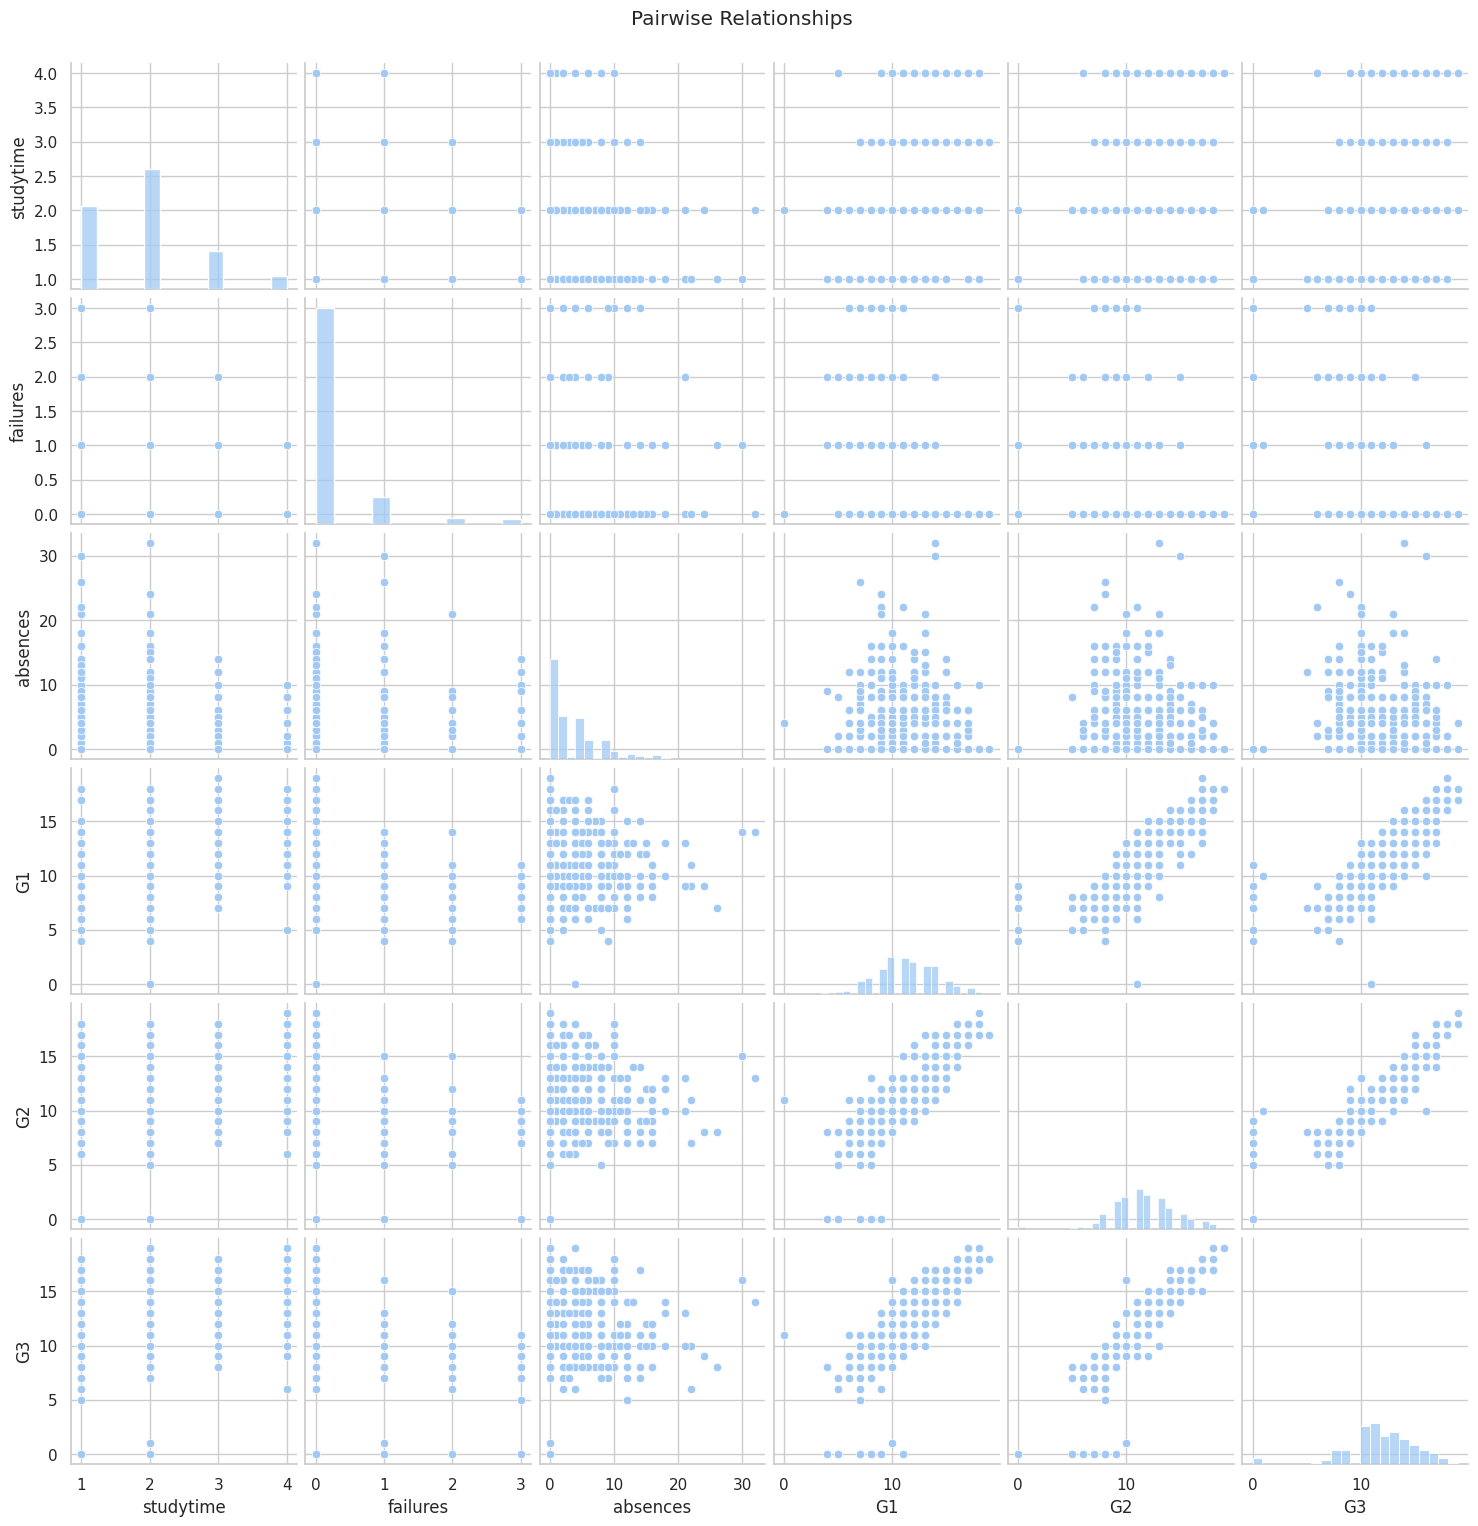

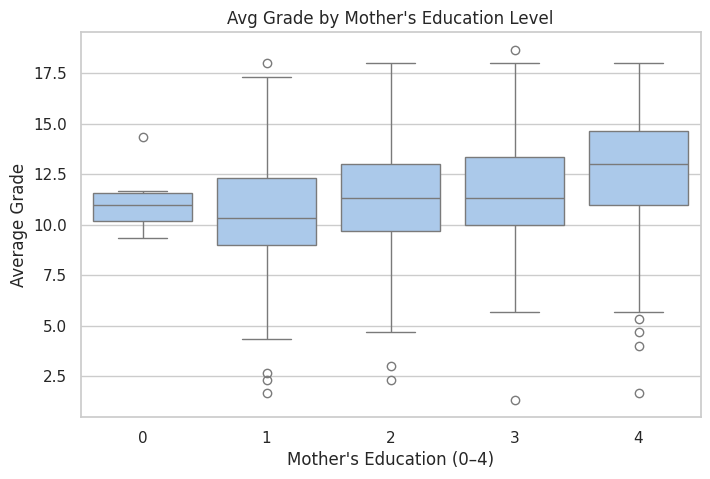

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df_student = pd.read_csv("student_performance_prepared.csv")

# Set up plot style
sns.set(style="whitegrid", palette="pastel")

# 1. Grade Distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(['G1', 'G2', 'G3', 'avg_grade']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_student[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Countplot: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df_student)
plt.title("Gender Distribution (0=F, 1=M)")
plt.show()

# 3. Countplot: Extra Educational Support
plt.figure(figsize=(6, 4))
sns.countplot(x='schoolsup', data=df_student)
plt.title("School Support (0=No, 1=Yes)")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_student.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 5. Pairplot: Study Time, Failures, Absences, Grades
sns.pairplot(df_student[['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# 6. Boxplot: Avg Grade by Parental Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medu', y='avg_grade', data=df_student)
plt.title("Avg Grade by Mother's Education Level")
plt.xlabel("Mother's Education (0–4)")
plt.ylabel("Average Grade")
plt.show()
